In [ ]:
import pandas as pd

In [ ]:
# Todos os dataframes tem o mesmo formato, e deverão ser integrados no ambiente após inicialização
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [ ]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
# Concatenação de 5 dataframes com mesmo formato
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
222,Natal,2019-01-02,43.96,1037,1
20,Salvador,2019-01-01,33.97,1034,3
54,Aracaju,2018-01-01,20.85,1523,1
31,Salvador,2019-01-01,202.25,1035,2
124,Fortaleza,2019-03-02,47.98,983,7


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
# Como loja ID não será usado para cálculo, será alterado para tipo object
df['LojaID'] = df['LojaID'].astype('object')

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
# Verificar se há valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
# Se existissem valores nulos, utilizar o seguinte comando para substituir os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
64,Natal,2019-02-22,704.00,853,4
74,Recife,2019-01-01,38.79,983,6
140,Natal,2019-01-02,20.79,1036,2
1,Recife,2019-01-01,11.44,983,1
124,Aracaju,2018-01-01,139.64,1522,5
105,Salvador,2019-01-01,32.83,1037,1
124,Recife,2019-03-02,47.98,983,7
16,Fortaleza,2019-01-01,97.32,1002,5
26,Fortaleza,2019-01-01,18.93,1005,2
109,Salvador,2019-03-02,124.37,1035,1


In [ ]:
df['Vendas'].mean()

122.61180089485458

In [ ]:
# Também é possível substituir por zero
df['Vendas'].fillna(0,inplace= True)

In [ ]:
# Ou apagar as linhas com valores nulos
df.dropna(inplace= True)

In [ ]:
# Também é possível restringir em qual coluna o valor nulo deve estar para remoçõa da linha
df.dropna(subset= 'Vendas',inplace= True)

In [ ]:
# Ou remover apenas as linhas com valores ausentes em todos as colunas
df.dropna(how='all', inplace= True)

In [ ]:
# Pode-se adicionar colunas
df['Receita'] = df['Vendas'].mul(df['Qtde'])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
# Inverso também pode ocorrer
df['Receita/Vendas'] = df['Receita'] / df['Vendas']
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [ ]:
# Retornando maior receita
df['Receita'].max()

3544.0

In [ ]:
# Retornando a menor receita
df['Receita'].min()

3.34

In [ ]:
#nlargest retorna as linhas com os n maiores valores da coluna desejada
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [ ]:
#nsmallest tem efeito contrário
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [ ]:
# Agrupamento por cidade também é possível - Nesse caso é retornado a soma das receitas por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
# Ordenando os conjuntos das receitas
df.sort_values('Receita', ascending= False).head(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com datas

In [ ]:
# Transformar para int
df['Data'] = df['Data'].astype('int64')

In [ ]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [ ]:
# Agrupamento por ano - Retorna a soma da receita por ano - dt = datetime
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
# Criando uma nova coluna do ano
df['Ano_Venda'] = df['Data'].dt.year
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
31,Salvador,2019-01-01,202.25,1035,2,404.5,2.0,2019


In [ ]:
# Extraindo o mês e dia
df['Mes_Venda'], df['Dia_Venda'] = df['Data'].dt.month, df['Data'].dt.day
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,3


In [ ]:
# Retornando a venda mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
# Calculando a diferença de dias - Como não temos duas colunas de datas, substraiu-se do mínimo
df['Diferença_Dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias
132,Natal,2019-01-02,19.61,1036,2,39.22,2.0,2019,1,2,366 days
16,Aracaju,2018-01-01,37.68,1522,10,376.80,10.0,2018,1,1,0 days
177,Natal,2019-01-02,41.19,1037,2,82.38,2.0,2019,1,2,366 days
6,Salvador,2019-01-01,36.30,1034,2,72.60,2.0,2019,1,1,365 days
4,Salvador,2019-02-14,19.47,1037,3,58.41,3.0,2019,2,14,409 days


In [ ]:
# Criando trimestre
df['Trimestre_Venda'] = df['Data'].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,Semestre_Venda,Trimestre_Venda
155,Natal,2019-01-02,237.81,1036,3,713.43,3.0,2019,1,2,366 days,1,1
214,Salvador,2019-01-02,54.94,1036,2,109.88,2.0,2019,1,2,366 days,1,1
132,Natal,2019-01-02,19.61,1036,2,39.22,2.0,2019,1,2,366 days,1,1
68,Recife,2019-01-01,175.45,980,3,526.35,3.0,2019,1,1,365 days,1,1
51,Fortaleza,2019-01-01,30.47,1005,3,91.41,3.0,2019,1,1,365 days,1,1


In [ ]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,Semestre_Venda,Trimestre_Venda
127,Salvador,2019-03-02,240.61,1035,3,721.83,3.0,2019,3,2,425 days,1,1
125,Fortaleza,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days,1,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1,1
114,Salvador,2019-03-02,25.52,1034,1,25.52,1.0,2019,3,2,425 days,1,1
119,Recife,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2,425 days,1,1
125,Salvador,2019-03-02,25.00,1037,2,50.00,2.0,2019,3,2,425 days,1,1
4,Natal,2019-03-09,699.00,853,3,2097.00,3.0,2019,3,9,432 days,1,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1,1
129,Recife,2019-03-02,35.34,982,7,247.38,7.0,2019,3,2,425 days,1,1
118,Salvador,2019-03-02,92.21,1035,2,184.42,2.0,2019,3,2,425 days,1,1


# Visualização de dados


In [ ]:
# Demonstra a quantidade de valores com um mesmo LojaID, ou seja, o número de vendas da loja
df['LojaID'].value_counts(ascending= False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<Axes: >

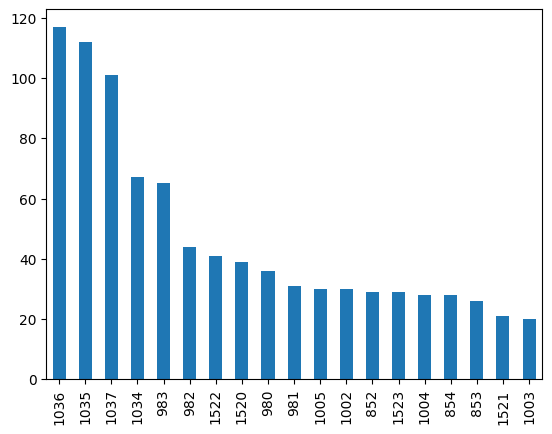

In [ ]:
# Gráfico de barras
df['LojaID'].value_counts(ascending= False).plot.bar()

<Axes: >

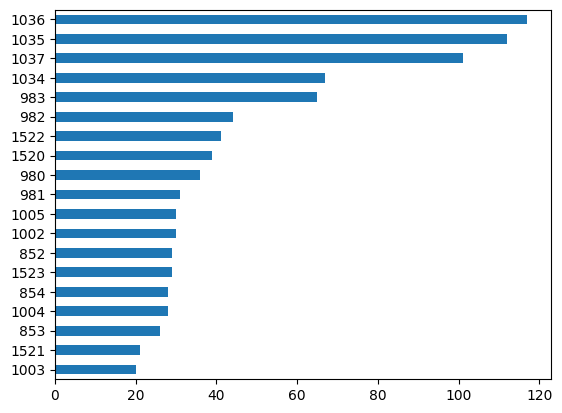

In [ ]:
# Gráfico de barras horizontais
df['LojaID'].value_counts(ascending= True).plot.barh()

<Axes: ylabel='Receita'>

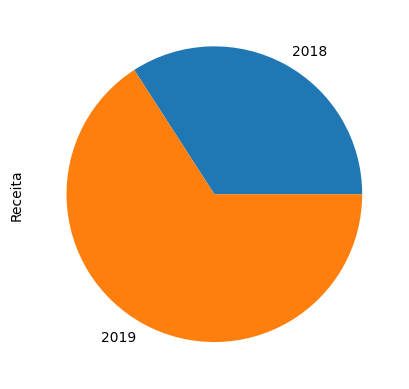

In [ ]:
# Gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [ ]:
# Total vendas da cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

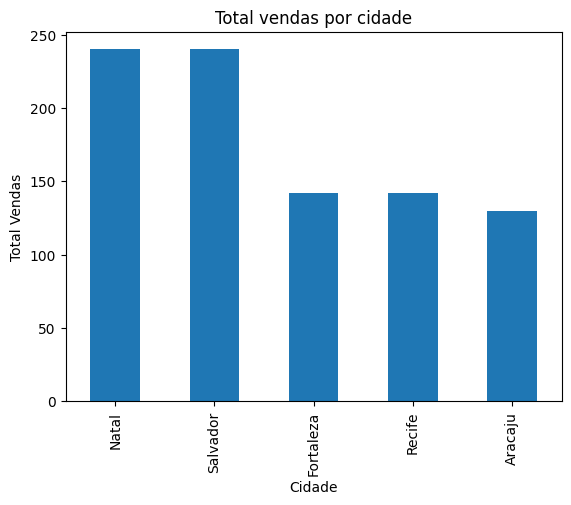

In [ ]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

Text(0, 0.5, 'Total Vendas')

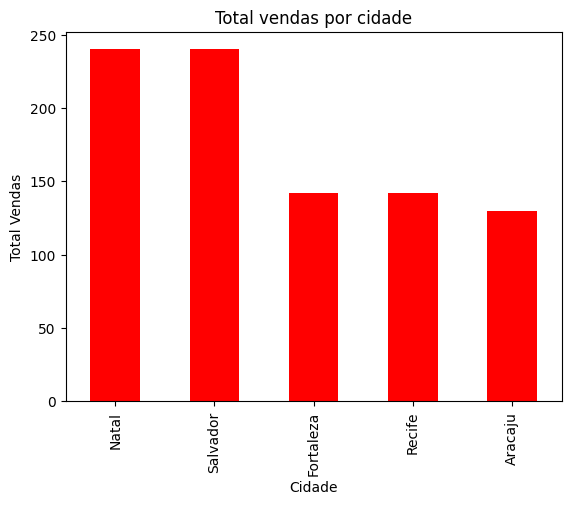

In [ ]:
# Alterando a cor
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

In [ ]:
# Alterando o estilo - Documentação: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('ggplot')

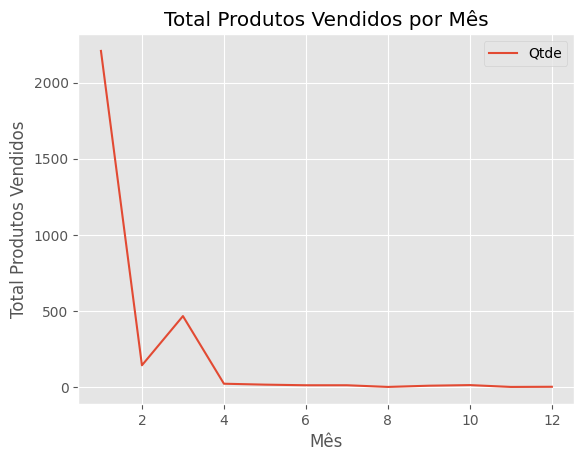

In [ ]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title= 'Total Produtos Vendidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [ ]:
df.groupby(df['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
df_2019 = df[df['Ano_Venda'] == 2019]
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

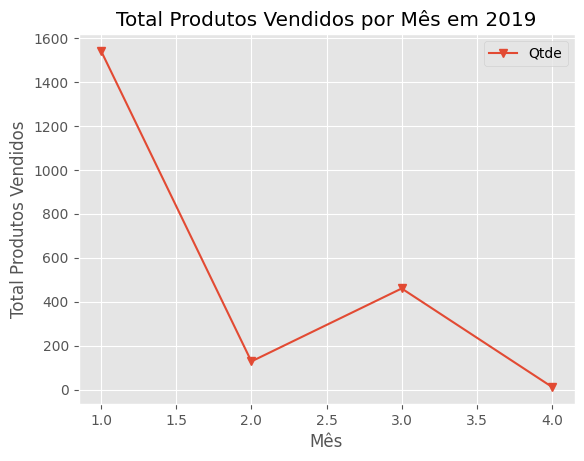

In [ ]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(title= 'Total Produtos Vendidos por Mês em 2019', marker = 'v')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

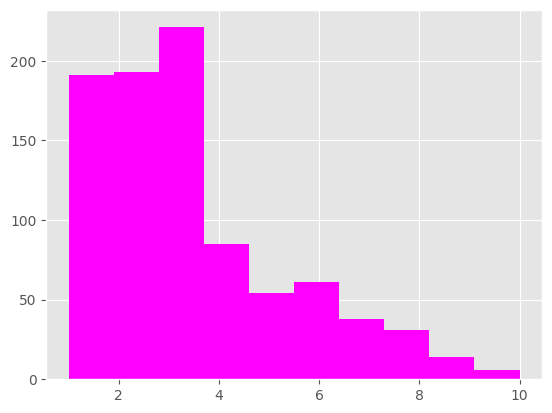

In [ ]:
# Histograma - Lista de cores matplot - Documentação: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.hist(df['Qtde'], color='magenta');

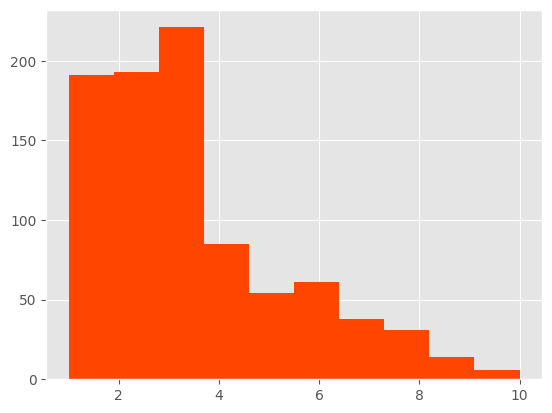

In [ ]:
plt.hist(df['Qtde'], color='orangered');

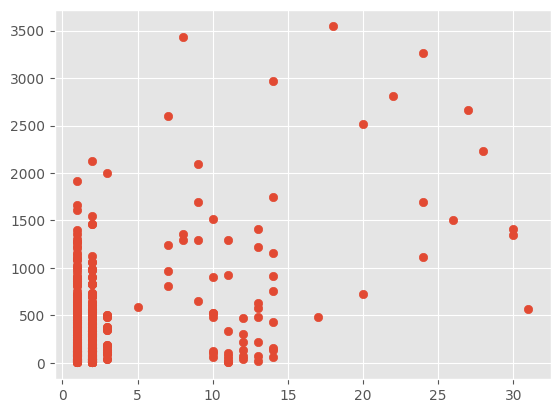

In [ ]:
plt.scatter(x  = df_2019['Dia_Venda'], y = df_2019['Receita'])

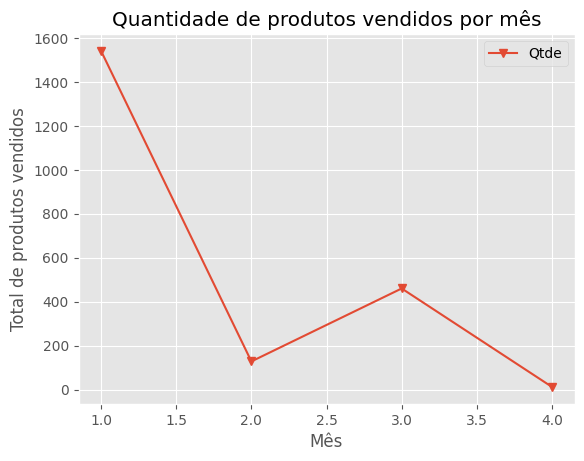

In [ ]:
# Salvando em png
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker= 'v')
plt.title('Quantidade de produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend()
plt.savefig('grafico_qtdeXmes.png')